In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [6]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [7]:
from keras.utils import np_utils

In [8]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [10]:
model = Sequential()

In [11]:
model.add(Dense(15,input_dim = 784))
model.add(Activation('selu'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.add(Dense(20))
model.add(Activation('selu'))

In [13]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.compile(loss = 'mse', optimizer=SGD(lr = 0.075), metrics = ['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
activation_1 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                320       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 12,305
Trainable params: 12,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, batch_size = 80, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0640 - acc: 0.5416
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0346 - acc: 0.7902
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0249 - acc: 0.8510
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0209 - acc: 0.8718
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0188 - acc: 0.8825
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0174 - acc: 0.8895
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0165 - acc: 0.8953
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0158 - acc: 0.8991
Epoch 9/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0152 - acc: 0.9028
Epoch 10/20
60000/60000 [===========================

In [17]:
predict = model.predict_classes(x_test)

In [18]:
predict

array([7, 2, 1, ..., 4, 8, 6])

In [19]:
def test(number):
    plt.imshow(x_test[number].reshape(28,28))
    print('神經網路判斷為：',predict[number])

神經網路判斷為： 9


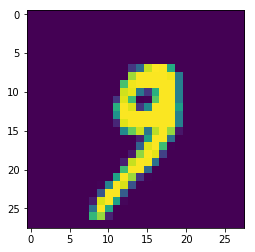

In [20]:
test(1000)

In [21]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 36us/step


In [22]:
print('loss:',score[0])
print('正確率',score[1])

loss: 0.01201123251770623
正確率 0.9219
